## A demonstration of Dimension Reduction via SVD

We illustrate using the SVD  of a grayscale image (treated as a matrix) to reduce the dimensions by choosing only the first $k$ singular values: this amounts to a *lossy image compression* technique.

In [1]:
import numpy as np
from sklearn.datasets import load_sample_image
import matplotlib.pyplot as plt
import matplotlib.image as image
%matplotlib inline

In [2]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])

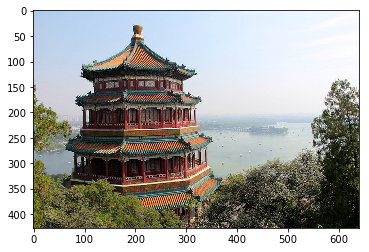

In [3]:
n_colors = 64

# Load the Summer Palace photo
china = load_sample_image("china.jpg")

plt.imshow(china)

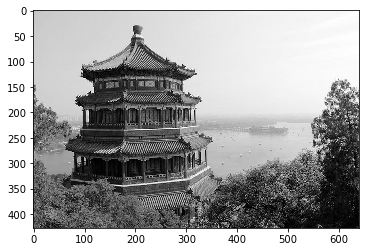

In [4]:
# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow behaves works well on float data (need to
# be in the range [0-1]
china = np.array(china, dtype=np.float64) / 255
gr_china = rgb2gray(china)
plt.imshow(gr_china, cmap = plt.get_cmap('gray'))
plt.show()

In [5]:
gr_china.shape

(427, 640)

In [6]:
gr_china[0,:10]

array([ 0.79716471,  0.79716471,  0.79716471,  0.79716471,  0.79716471,
        0.79716471,  0.79716471,  0.79716471,  0.79885882,  0.79481961])

In [7]:
gr_cmap = plt.get_cmap('gray')

In [8]:
gr_china = np.matrix(gr_china)

In [9]:
u, sigma, v = np.linalg.svd(gr_china)

In [10]:
def rank_k_approx(img, k):
    """Return a rank-k approximation
    
    img: an image (as a 2D grayscale array)
    k: number of singular vectors used"""
    u, sigma, vt = np.linalg.svd(img)
    energy = np.linalg.norm(sigma)**2
    approx_energy = np.linalg.norm(sigma[:k])**2
    percentage = approx_energy*100/energy
    print ("Energy retained = %4.2f"%percentage)
    return u[:,:k]*np.diag(sigma[:k])*vt[:k,:]

In [11]:
sigma

array([  3.36670333e+02,   6.21901568e+01,   3.97087734e+01,
         2.33680972e+01,   1.92263702e+01,   1.67860556e+01,
         1.59370960e+01,   1.37681126e+01,   1.25924254e+01,
         1.22796977e+01,   1.18920469e+01,   1.10048512e+01,
         1.06530521e+01,   9.78090657e+00,   9.26014394e+00,
         8.77170393e+00,   8.48368658e+00,   8.12354881e+00,
         7.95904980e+00,   7.88264869e+00,   7.67329672e+00,
         7.56987564e+00,   7.35568652e+00,   7.23966563e+00,
         6.98024295e+00,   6.78827531e+00,   6.70446406e+00,
         6.55754451e+00,   6.32141007e+00,   6.27835039e+00,
         6.06085408e+00,   5.93694749e+00,   5.82196252e+00,
         5.76689591e+00,   5.64815430e+00,   5.49381934e+00,
         5.38850544e+00,   5.31417803e+00,   5.24776431e+00,
         5.21534301e+00,   5.15876525e+00,   4.97370430e+00,
         4.91160635e+00,   4.88771328e+00,   4.85856335e+00,
         4.81250613e+00,   4.78153307e+00,   4.70911672e+00,
         4.61041989e+00,

In [12]:
approx = rank_k_approx(gr_china, 100)

Energy retained = 99.45


In [13]:
approx[0,:10]

matrix([[ 0.79393662,  0.79489188,  0.78409724,  0.79049706,  0.80643225,
          0.79285705,  0.79226603,  0.80766556,  0.79999222,  0.80570158]])

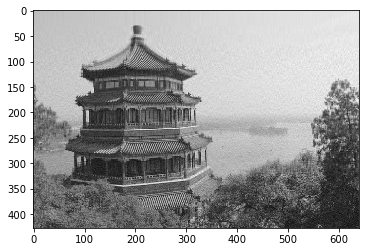

In [14]:
plt.imshow(approx, cmap = gr_cmap)
plt.show()